Observations from dataset:
1. Majority of the target users had a compound sentiment close to 0 "neutral"
2. CBS and BBC had positive compound sentiments "postive tweets"
3. CNN and NY Times had negitive compound sentiments "negative tweets"
4. I would be curious to see what the sentiment analysis showed on the retweets, are users excited about the new or not excited about the news.
5. The tweets show that the news is evenly positive and negative.

In [132]:
import tweepy
import numpy as np
import pandas as pd
from pprint import pprint
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [133]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [134]:
# Target Search Term
target_terms = ("@BBC", 
                "@CBS", 
                "@CNN",
                "@FoxNews", 
                "@nytimes"
               )
user_data={"Twitter Account":[],
            "Tweet":[],
           "Tweets Ago":[],
          }
number=1

In [135]:
for target in target_terms:
    # Variable for holding the oldest tweet
    print(f"{number}. Fetching tweets for {target}")
    counter=1
    number +=1
    for x in range(5):
        public_tweets = api.user_timeline(target, page=x)
        #pprint(public_tweets)
        for tweet in public_tweets:
            user_data["Twitter Account"].append(tweet["user"]["name"])
            user_data["Tweet"].append(tweet["text"])
            user_data["Tweets Ago"].append(counter)
            counter+=1

1. Fetching tweets for @BBC
2. Fetching tweets for @CBS
3. Fetching tweets for @CNN
4. Fetching tweets for @FoxNews
5. Fetching tweets for @nytimes


In [136]:
user_tweet=pd.DataFrame.from_dict(user_data)
user_tweet.head()

,Twitter Account,Tweet,Tweets Ago
0,BBC,RT @BBCnireland: ✍ @BBCApprentice is back toni...,1
1,BBC,❤️ Couples will soon be able to choose a civil...,2
2,BBC,🍜 The humble origins of an incredibly versatil...,3
3,BBC,🌙 'Leonardo da Vinci was the first recorded pe...,4
4,BBC,That time @RyanGosling was training to be an a...,5


In [137]:
user_tweet["Compound"]=""

In [148]:
for index, row in user_tweet.iterrows():
    results = analyzer.polarity_scores(row["Tweet"])
    user_tweet.loc[index, "Compound"] = results["compound"]
user_tweet.to_csv(path_or_buf="Sentiment Analysis.csv", sep=',')

In [139]:
final_chart_data1 = user_tweet.loc[user_tweet["Twitter Account"] == "BBC", :]
final_chart_data2 = user_tweet.loc[user_tweet["Twitter Account"] == "CBS", :]
final_chart_data3 = user_tweet.loc[user_tweet["Twitter Account"] == "CNN", :]
final_chart_data4 = user_tweet.loc[user_tweet["Twitter Account"] == "Fox News", :]
final_chart_data5 = user_tweet.loc[user_tweet["Twitter Account"] == "The New York Times", :]


In [140]:
x_axis1 = final_chart_data1["Tweets Ago"]
y_axis1 = final_chart_data1["Compound"]
labels1 = "BBC"

In [141]:
x_axis2 = final_chart_data2["Tweets Ago"]
y_axis2 = final_chart_data2["Compound"]
labels2 = "CBS"

In [142]:
x_axis3 = final_chart_data3["Tweets Ago"]
y_axis3 = final_chart_data3["Compound"]
labels3 = "CNN"

In [143]:
x_axis4 = final_chart_data4["Tweets Ago"]
y_axis4 = final_chart_data4["Compound"]
labels4 = "FoxNews"

In [144]:
x_axis5 = final_chart_data5["Tweets Ago"]
y_axis5 = final_chart_data5["Compound"]
labels5 = "NY Times"

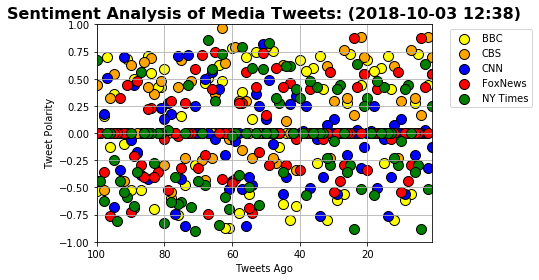

In [145]:
plt.scatter(x_axis1, y_axis1, linewidth=1, lw=1, s=100, marker="o", color="yellow", alpha=1, edgecolor="black", label="BBC")
plt.scatter(x_axis2, y_axis2, linewidth=1, lw=1, s=100, marker="o", color="orange", alpha=1, edgecolor="black", label="CBS")
plt.scatter(x_axis3, y_axis3, linewidth=1, lw=1, s=100, marker="o", color="blue", alpha=1, edgecolor="black", label="CNN")
plt.scatter(x_axis4, y_axis4, linewidth=1, lw=1, s=100, marker="o", color="red", alpha=1, edgecolor="black", label="FoxNews")
plt.scatter(x_axis5, y_axis5, linewidth=1, lw=1, s=100, marker="o", color="green", alpha=1, edgecolor="black", label="NY Times")
plt.xlim([x_axis1.max(),x_axis1.min()])
plt.ylim(-1, 1)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title((f"Sentiment Analysis of Media Tweets: ({now})"), fontsize=16, fontweight="bold")
plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1))
plt.grid()
plt.savefig("Images/Sentiment Analysis.png")
plt.show()

In [146]:
average_BBC=final_chart_data1["Compound"].mean()
average_CBS=final_chart_data2["Compound"].mean()
average_CNN=final_chart_data3["Compound"].mean()
average_FoxNews=final_chart_data4["Compound"].mean()
average_NYTimes=final_chart_data5["Compound"].mean()
accounts=["BBC", "CBS", "CNN", "FoxNews", "NYTimes"]
x_axis_bar=np.arange(len(accounts))
average_compounds=[average_BBC, average_CBS, average_CNN, average_FoxNews, average_NYTimes]

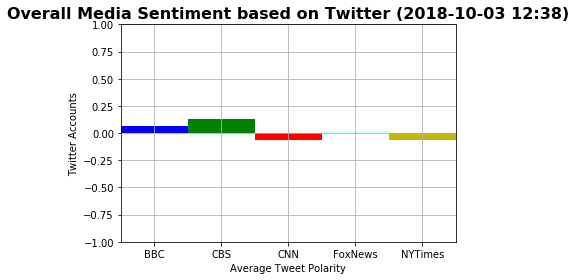

In [149]:
plt.bar(x_axis_bar, average_compounds, color={"#d4ffff","g","r","b","#c2b709"}, align="center", width=1)
tick_locations = [value for value in x_axis_bar]
plt.xticks(tick_locations, accounts)
plt.xlim(-0.5, len(x_axis_bar)-0.5)
plt.ylim(-1, 1)
plt.title((f"Overall Media Sentiment based on Twitter ({now})"), fontsize=16, fontweight="bold")
plt.xlabel("Average Tweet Polarity")
plt.ylabel("Twitter Accounts")
plt.grid()
plt.savefig("Images/Sentiment Analysis-Average Polarity.png")
plt.show() 